# Exercise 1

白日依山尽，黃河入海流；欲穷千里目，更上一层楼。

This is a famous Chinese poem written during the Tang Dynasty. To truly appreciate it, use the API offered by OpenAI to:

(1) translate it into English and display the translation,

(2) explain its meaning in English in at most 50 words and display the explanation,

(3) generate an audio file in which the poem is recited in its original language, and then it is explained in English.

You can use the code below as your starting point:

### Setup

First, make the necessary imports.

In [1]:
!pip install openai

from google.colab import userdata
import os
from pathlib import Path
from openai import OpenAI
import IPython.display as ipd
import getpass
from PIL import Image
import urllib.request
from IPython.display import Markdown

Then, assign the API key for OpenAI.

When working with sensitive information like API keys or passwords in Google Colab, it's crucial to handle data securely. As you learnt in the tutorial session, two common approaches for this are using Colab's Secrets Manager, which stores and retrieves secrets without exposing them in the notebook, and `getpass`, a Python function that securely prompts users to input secrets during runtime without showing them. Both methods help ensure your sensitive data remains protected.


In [2]:
#When using Colab Secret Manager
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
#When using getpass
#os.environ['OPENAI_API_KEY'] = getpass.getpass()

client = OpenAI()

### Step 1. Translation and Explanation Using OpenAI Responses API

This is your starting point, with the original poem in `originalText`.

In [3]:
originalText = '白日依山尽，黃河入海流；欲穷千里目，更上一层楼。'

Define a function `translateFromChineseToEnglish` that uses the Responses API with `gpt-4.1` as the model to translate from Chinese to English.

**Hint:** the input should be built as a formatted string. It should have a static instruction defining the task of translating your poem from Chinese into English, and returning only the English translation. A variable should be used to dynamically insert the poem.

In [8]:
# Use the Responses API to translate the poem
def translateFromChineseToEnglish(text):
  ## YOUR CODE (START)

  response = client.responses.create(
          model="gpt-4.1",
          input=(
            "Translate the following sentence from Chinese to English. "
            "Return only the English translation.\n\n"
            f"English: {text}\n"
            "German:"
          ),
      )

  ## YOUR CODE (END)
  return response.output_text

In [9]:
translatedText = translateFromChineseToEnglish(originalText)
display(Markdown(translatedText))

The white sun sets behind the mountains, the Yellow River flows into the sea; to enjoy a grander sight, climb to a greater height.

Define a function `explainMeaning(text)` that uses the **Responses API** with `gpt-4.1` to explain the meaning of a poem in **max. 50 words**.

**Requirements:**
- Use a single instruction string as `input`
- Include: simple language, analogies, no technical jargon
- Insert the poem dynamically using a Python variable (e.g., with an f-string)
- Use `response.output_text` to return the explanation



In [18]:
# Use Responses API to explain the meaning of the poem
def explainMeaning(text):
  ## YOUR CODE (START)
  response = client.responses.create(
    model="gpt-4.1",
    input=(
        "You are a skilled linguist. Explain the meaning of the poem in max. 50 words.Use simple language, no technical jargon.\n\n"
        f"explain: {translatedText}\n"
    )
)
  ## YOUR CODE (END)
  return response.output_text

In [19]:
meaning = explainMeaning(translatedText)
display(Markdown(meaning))

The poem says: As the sun sets and the river keeps flowing, there is so much beauty in the world. To see and understand more, you must go higher and try harder. It encourages us to seek bigger goals and broader views in life.

Now that the two functions are defined, you can call them to obtain and display the translation and the explanation of the poem.

In [20]:
# Call function translateFromChineseToEnglish to obtain the translation
translatedText = translateFromChineseToEnglish(originalText)

# Call function explainMeaning to obtain the explanation
explainedText = explainMeaning(translatedText)

# Display the translation and the explanation
display(Markdown(translatedText))
display(Markdown(explainedText))

The sun sets behind the mountains, the Yellow River flows into the sea;  
To see a thousand miles farther, go up one more floor.

The poem says that to see more and go further, you need to climb higher. It uses nature—mountains, river, and the sea—to show that if you want to achieve more or understand more, you must rise above your current place.

You can experiment with the prompt in function `explainMeaning` to influence the depth, style, or clarity of the explanation. For example, try asking for more detail, a simpler explanation, or a different tone to see how the response changes. Do not forget to re-execute the cell where the function is defined before calling it again to obtain a new explanation.

### Step 2. Speech Generation Using OpenAI Audio API

Define a function `generateTextToSpeech` to generate an audio file `speech.mp3` using the Audio API with `gpt-4o-mini-tts` as the model and `coral` as the voice.

In [23]:
# Use the Audio API to generate text to speech
def generateTextToSpeech(text):
  ## YOUR CODE (START)
    speech_file_path = "speech.mp3"
    with client.audio.speech.with_streaming_response.create(
        model="gpt-4o-mini-tts",
        voice="coral",
        input=text
    ) as response:
        response.stream_to_file(speech_file_path)
  ## YOUR CODE (END)
        return speech_file_path

Now that the function is defined, call it passing the original poem text in Chinese and the explanation in English.

In [25]:
# Call the generateTextToSpeech function to obtain the audio
fileName = generateTextToSpeech(originalText + explainedText)

# Present the audio file
ipd.Audio(filename=fileName)

### Step 3. Image Generation Using OpenAI Images API

Using the Images API with `DALL-E-3` as the model, define a function `generatePoemImage` to generate a 1024x1024 image.

In [29]:
## use the Images API with dall-e-3 to generate an image based on the poem
def generatePoemImage(prompt2): #argument muss net prompt heissn egal
  ## YOUR CODE (START)
  client = OpenAI()

  response = client.images.generate(
    model="dall-e-3",
    prompt=translatedText,
    size="1024x1024"
  )
  ## YOUR CODE (END)
  return response.data[0].url

Now that the function is defined, call it passing as parameter the English translation of the poem.

In [30]:
# Call the generatePoemImage function to generate the image
poem_image_url = generatePoemImage(translatedText)

Open and display the image that is stored at `poem_image_url`.

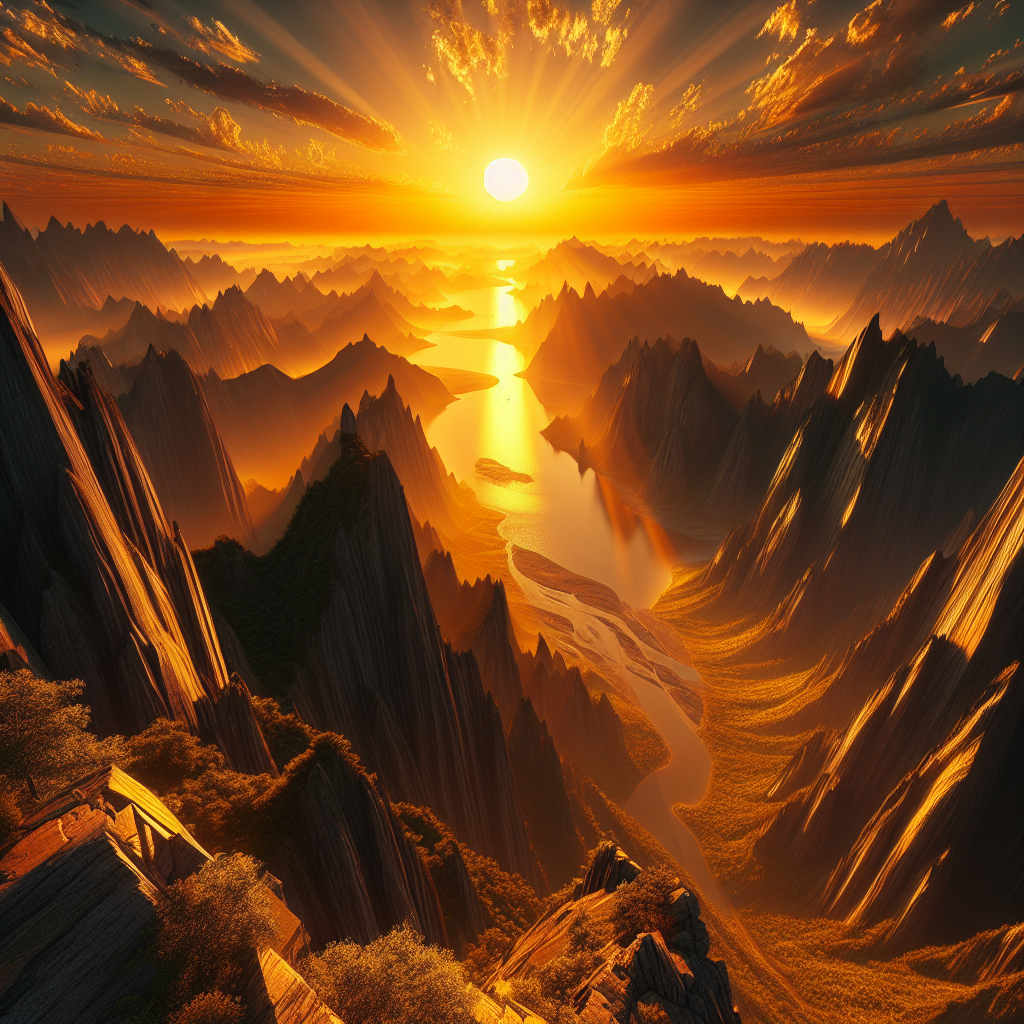

In [31]:
# Open the image given its URL
## YOUR CODE (START)
from PIL import Image
import urllib.request

with urllib.request.urlopen(poem_image_url) as url:
    img=Image.open(url)
    display(img)
## YOUR CODE (END)

# Exercise 2

In this exercise, you will get inspiration for cooking dinner based on the ingredients at your disposal in the fridge.

(1) You will first analyze a picture of the fridge, then

(2) use the Responses API to generate a recipe and

(3) a name for the dish, and finally

(4) you will use Dall-E-3 to generate a picture of the dish.

To accomplish this, you can expand the code provided below:

### Setup

First, make the necessary imports.

In [32]:
!pip install openai

from google.colab import userdata
import os
from pathlib import Path
from openai import OpenAI
import IPython.display as ipd
import getpass
from PIL import Image
import urllib.request
from IPython.display import Markdown

Then, assign the API key for OpenAI.

In [33]:
#When using Colab Secret Manager
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
#When using getpass
#os.environ['OPENAI_API_KEY'] = getpass.getpass()

client = OpenAI()

This is your starting point, with a picture of the fridge contents specified in a URI.

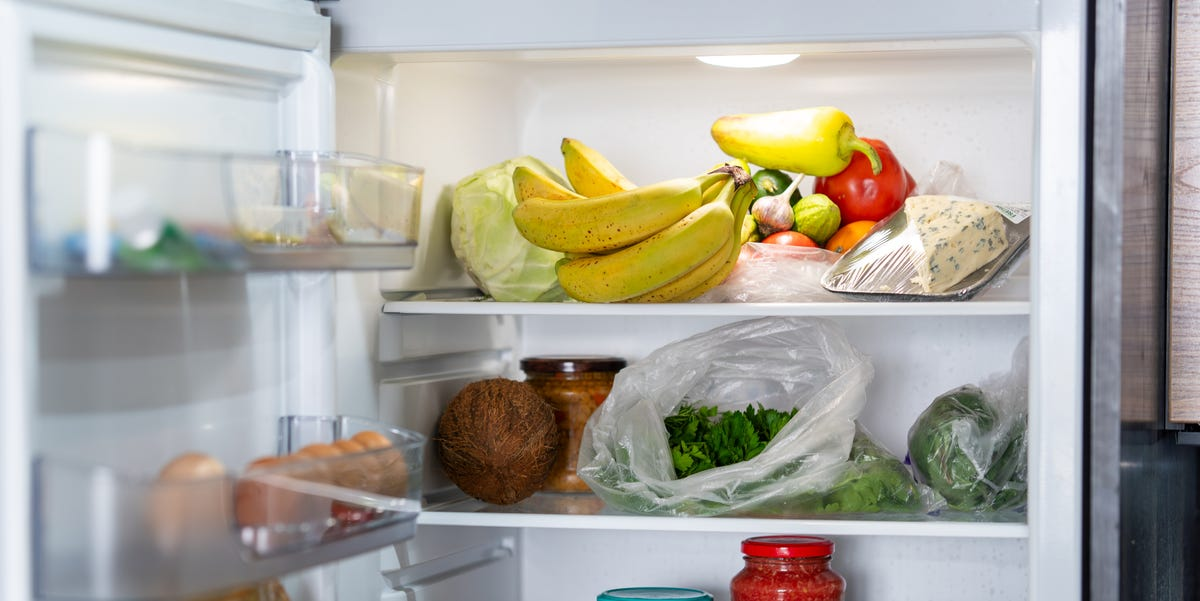

In [34]:
uri = 'https://hips.hearstapps.com/hmg-prod/images/open-refrigerator-filled-with-fresh-fruits-and-royalty-free-image-1727120488.jpg?crop=1.00xw:0.752xh;0,0&resize=1200:*'
with urllib.request.urlopen(uri) as url:
    img=Image.open(url)
    display(img)

### Step 1. Using Responses API to Identify Ingredients

Define a function that uses the Responses API with `gpt-4.1` as the model for listing the ingredients visible in the picture at the specified URI.

**Hint:** you can find an example of an input for image analysis here: https://platform.openai.com/docs/guides/images-vision (under section "Analyze images").

In [37]:
# Add your code to list the ingredients visible in the picture at the specified URI.
def listIngredients(uri):
  ## YOUR CODE (START)
    response = client.responses.create(
        model="gpt-4.1",
        input=[{
            "role": "user",
            "content": [
                {"type": "input_text", "text": "Identify and list the ingredients you see in the picture"},
                {"type": "input_image", "image_url": uri},
            ],
        }],
    )
  ## YOUR CODE (END)
    return response.output_text

Now that the function is defined, call it to obtain the list of available ingredients into a variable `ingredients`.

In [38]:
#Call the listIngredients function to get the ingredients
ingredients = listIngredients(uri)

# Display the ingredients
display(Markdown(ingredients))

Here are the ingredients I can identify in the refrigerator:

1. Bananas
2. Cabbage
3. Yellow bell pepper
4. Red bell pepper
5. Tomatoes
6. Cheese (possibly blue cheese or a type of cheese with blue veins)
7. Eggs (on the door)
8. Coconut (whole, brown)
9. Fresh herbs (possibly parsley or cilantro) in a plastic bag
10. Leafy greens (possibly lettuce or spinach) in a plastic bag
11. Preserved/jarred food (possibly pickles or sauce, in jars)
12. Red sauce or preserves (in a red-lidded jar, bottom shelf)

Let me know if you need more details or if you want recipes with these ingredients!

### Step 2. Using Responses API to Create Recipe

Next, prompt the Responses API to create a recipe based on the ingredients. Use `gpt-4.1-mini` as model.

**Hint:** the input should instruct the model to create a recipe based on the ingredients passed as a variable.

In [ ]:
# Add your code to create a recipe based on the ingredients
def createRecipe(ingredients):
  ## YOUR CODE (START)
  response = client.responses.create(
      model="gpt-4.1",
      input=("You are a skilled cook. Make me a recipie based on the following ingredients: "
             f"{ingredients}"
    )
  )
  ## YOUR CODE (END)
  return response.output_text

Now that the function is defined, call it passing `ingredients` as parameter and display the resulting recipe.

In [ ]:
# Call the createRecipe function to get the recipe
recipe = createRecipe(ingredients)

# Display the recipe
display(Markdown(recipe))

### Step 3. Using Responses API to Generate Dish Name

Now use again the Responses API along with the `gpt-4.1-mini` model to generate a creative name for the dish described by the recipe.

In [ ]:
# Add your code here to generate a name for the dish
def generateDishName(recipe):
  ## YOUR CODE (START)

  ## YOUR CODE (END)
  return response.output_text

Now that the function is defined, call it passing `recipe` as parameter to obtain the dish name.

In [ ]:
# Call the generateDishName function to get the dish name
dishName = generateDishName(recipe)

# Display the dish name
display(Markdown(dishName))

### Step 4. Image Generation Using OpenAI Images API

Now use the OpenAI Images API with `dall-e-3` as the model to create an image using the name of the dish as prompt.

In [ ]:
# Add your code here to generate an image using the Images API with Dall-E-3 based on the prompt
def generateDishImage(prompt):
  ## YOUR CODE (START)

  ## YOUR CODE (END)
  return response.data[0].url

Now that the function is defined, call it to generate the dish image.

In [ ]:
# Call the generateDishImage function to generate the image
dish_Image_Uri = generateDishImage(dishName)

Finally, display the image of the dish given its URL.

In [ ]:
# Add your code here to display the image
## YOUR CODE (START)

## YOUR CODE (END)